In [118]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt

In [122]:

widgetYear = widgets.Dropdown(
    options=['2014', '2015', '2016','2017','2018','2019','2020'],
    value='2014',
    description='Year:',
    disabled=False,
)
widgetMonth = widgets.Dropdown(
    options=['Jan', 'Feb', 'Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],
    value='Jan',
    description='Month:',
    disabled=False,
)
widgetDay = widgets.Dropdown(
    options=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
    value=1,
    description='Day:',
    disabled=False,
)
widgetDataToPlot = widgets.Dropdown(
    options=['Temperature', 'Dew Point', 'Humidity','Wind', 'Wind Speed' ,'Wind Gust','Pressure','Precip','Condition'],
    value='Temperature',
    description='Data To Plot:',
    disabled=False,
)
display(widgetYear,widgetMonth,widgetDay,widgetDataToPlot)

Dropdown(description='Year:', options=('2014', '2015', '2016', '2017', '2018', '2019', '2020'), value='2014')

Dropdown(description='Month:', options=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct…

Dropdown(description='Day:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2…

Dropdown(description='Data To Plot:', options=('Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed', '…

In [129]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  9 15:16:17 2020

@author: Adewole
"""

year = widgetYear.value
month = widgetMonth.value
day = widgetDay.value
dataToPlot = widgetDataToPlot.value

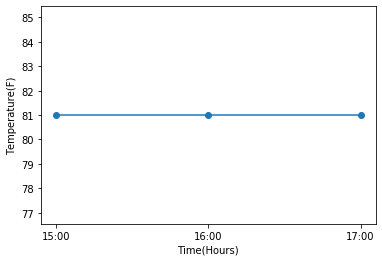

In [130]:
start = (day - 1) * 24
end = start + 24


df = pd.read_excel( year +'.xlsx', month)

# extraction but it is still in dataframe class
time = df.iloc[start:end, 2:3]
temperature = df.iloc[start:end, 3:4]
dewPoint = df.iloc[start:end, 4:5]
humidity = df.iloc[start:end, 5:6]
wind = df.iloc[start:end, 6:7]
windSpeed = df.iloc[start:end, 7:8]
windGust = df.iloc[start:end, 8:9]
pressure = df.iloc[start:end, 9:10]
precip = df.iloc[start:end, 10:11]
condition = df.iloc[start:end, 11:12]

# save it back to the time and temperature

df['Time'] = time
df['Temperature'] = temperature
df['Dew Point'] = dewPoint
df['Humidity'] = humidity
df['Wind'] = wind
df['Wind Speed'] = windSpeed
df['Wind Gust'] = windGust
df['Pressure'] = pressure
df['Condition'] = condition

# change dataframe to series and the object to string
# remove the empty spaces
mytime = df['Time'].dropna(how='any').astype('str')

temperature1 = df['Temperature'].dropna(how='any').astype('str')
dewPoint1 = df['Dew Point'].dropna(how='any').astype('str')
humidity1 = df['Humidity'].dropna(how='any').astype('str')
wind1 = df['Wind'].dropna(how='any').astype('str')
windSpeed1 = df['Wind Speed'].dropna(how='any').astype('str')
windGust1 = df['Wind Gust'].dropna(how='any').astype('str')
pressure1 = df['Pressure'].dropna(how='any').astype('str')
precip1 = df['Precip'].dropna(how='any').astype('str')
condition1 = df['Condition'].dropna(how='any').astype('str')

#Data Value extraction for number joined with alphabet
mytime1 = mytime.str.extract(r'(^.{0,5})')

a = temperature1.str.extract(r'(^.{0,3})')
b = dewPoint1.str.extract(r'(^.{0,3})')
c = humidity1.str.extract(r'(^.{0,3})')
d = windSpeed1.str.extract(r'(^.{0,2})')
e = windGust1.str.extract(r'(^.{0,2})')
f = pressure1.str.extract(r'(^.{0,6})')
g = precip1.str.extract(r'(^.{0,3})')
# Wind & Condition are not extracted since the do not contain numbers

#Returning the extracted value back to the dataframe
df['Time'] = mytime1

df['Temperature'] = a
df['Dew Point'] = b
df['Humidity'] = c
df['Wind Speed'] = d
df['Wind Gust'] = e
df['Pressure'] = f
df['Precip'] = g

time = df['Time'].dropna(how='any').astype('str')

temp2 = df['Temperature'].dropna(how='any').astype('str')
dewPoint2 = df['Dew Point'].dropna(how='any').astype('str')
humidity2 = df['Humidity'].dropna(how='any').astype('str')
wind2 = df['Wind'].dropna(how='any').astype('str')
windSpeed2 = df['Wind Speed'].dropna(how='any').astype('str')
windGust2 = df['Wind Gust'].dropna(how='any').astype('str')
pressure2 = df['Pressure'].dropna(how='any').astype('str')
precip2 = df['Precip'].dropna(how='any').astype('str')
condition2 = df['Condition'].dropna(how='any').astype('str')

#Changing string values to int and float
temp3 = temp2.astype('int')
dewPoint3 = dewPoint2.astype('int')
humidity3 = humidity2.astype('int')
wind3 = wind2
windSpeed3 = windSpeed2.astype('int')
windGust3 = windGust2.astype('int')
pressure3 = pressure2.astype('float')
precip3 = pressure2.astype('float')
condition3 = condition2


if(dataToPlot == 'Temperature'):
    plt.plot(time,temp3,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Temperature(F)")
elif(dataToPlot == 'Dew Point'):
    plt.plot(time,dewPoint3,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Dew Point(F)")
elif(dataToPlot == 'Humidity'):
    plt.plot(time,humidity3,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Humidity(%)")
elif(dataToPlot == 'Wind'):
    plt.plot(time,wind3,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Wind")
elif(dataToPlot == 'Wind Speed'):
    plt.plot(time,windSpeed3,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Wind Speed(mph)")
elif(dataToPlot == 'Wind Gust'):
    plt.plot(time,windGust3,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Wind Gust(mph)")
elif(dataToPlot == 'Pressure'):
    plt.plot(time,pressure3,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Pressure(in)")
elif(dataToPlot == 'Precip'):
    plt.plot(time,precip3,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Precip(in)")
elif(dataToPlot == 'Condition'):
    plt.plot(time,condition3,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Condition")
else:
    print("Enter a correct data to plot")







